# Distribuciones de datos

La distribución de una variable (eje de datos), explica cómo se propagan los valores en el espacio. Para un eje, por ejemplo, la distribución podría explicar dónde están centrados (media de los datos) y cuál es su varianza (o desviación estándar). Con esta información podríamos simular datos similares, distribuidos de forma semejante.

Por ejemplo, si un tornillo fabricado tiene en promedio 4 mm de alto y 2 mm de ancho. Entonces podemos recrear datos de medidas de tornillos, si estos estuvieran bajo cierta distribución.

Las dos distribuciones más comúnes son:

* Uniforme - Significa que cada medida tiene la misma probabilidad de ocurrir, por ejemplo, [1, 1, 2, 2, 3, 3]
* Normal - Significa que las medidas se aproximan a un centro (un valor medio) y es muy poco probable que se alejen de ese centro hacia la izquierda o derecha como en una campana (la campana de Gauss), por ejemplo, [4.0, 4.0, 4.1, 3.9, 4.05, 4.07, 3.98, 3.93, 4.0]

In [1]:
import pandas as pd

proyectos = pd.read_excel("D:\\data\\ProyectosFinalizados.xlsx", sheet_name="base")

def limpiar_columna(columna):
    # 1. Reemplazar caracteres especiales
    columna = columna.replace(" ", "_") \
        .replace("á", "a") \
        .replace("é", "e") \
        .replace("í", "i") \
        .replace("ó", "o") \
        .replace("ú", "u") \
        .replace("ñ", "n") \
        .replace("+", "_") \
        .replace(".", "_") \
        .replace("(", "_") \
        .replace(")", "")
    import re
    # 2. Poner un guion bajo entre cambio de letras de minúscula a mayúsculas
    columna = re.sub("([a-z])([A-Z])", "\\1_\\2", columna)
    # 3. Poner un guion bajo entre ID y letra
    columna = re.sub("ID([A-Za-z])", "ID_\\1", columna)
    # 4. Poner un guion bajo entre número y letra
    columna = re.sub("([0-9])([A-Za-z])", "\\1_\\2", columna)
    # 4. Poner un guion bajo entre letra y número
    columna = re.sub("([A-Za-z])([0-9])", "\\1_\\2", columna)
    # 5. Quitar un guion bajo entre letra y número
    columna = re.sub("([A-Za-z])_([0-9])", "\\1\\2", columna)
    # 6. Poner un guion bajo entre letra y número final
    columna = re.sub("([A-Za-z])([0-9])$", "\\1_\\2", columna)
    # 7. Convertir a mayúsculas
    columna = columna.upper()
    return columna

proyectos.columns = map(limpiar_columna, proyectos.columns.values)

proyectos.head()

,ID_PROYECTO,EMPRESA,PETICION,PETICION_1,PET_EMPRESA,NOMBRE,CFP,EFICIENCIA,PDR,ESFUERZO_TOTAL_P,...,PDR_S,PDR_M_1,PDR_M_2,PDR_L,LEAD_TIME,F1_GESTIONDELA_DEMANDA,F2_ELICITACION,F3_CONTRUCCION,F4_FINAL,TAMANO
0,1,México,8318.0,8318,8318México,Modificación a la utileria de generación de pa...,12,NaN,33.708333,404.5,...,NaN,NaN,NaN,NaN,914.0,825.0,8.0,42.0,35.0,10-29
1,2,México,9619.0,9619,9619México,Modificacion al programa Vbncarga.exe,2,NaN,147.500000,295.0,...,NaN,NaN,NaN,NaN,609.0,584.0,7.0,14.0,1.0,2-9
2,3,México,10438.0,10438,10438México,Permisos para Cambios de puntos de Sembrado- P...,11,NaN,51.375455,1019.0,...,NaN,NaN,NaN,NaN,519.0,461.0,2.0,37.0,1.0,10-29
3,4,México,10522.0,10522,10522México,Corrección del informe TabuladoCredito,11,NaN,47.727273,525.0,...,NaN,NaN,NaN,NaN,493.0,455.0,9.0,27.0,1.0,10-29
4,5,México,10528.0,10528,10528México,Corrección al Tabulado de Carteras y Hojas men...,4,NaN,26.290000,213.0,...,NaN,NaN,NaN,NaN,557.0,520.0,5.0,30.0,0.0,2-9


In [2]:
proyectos["ESFUERZO_TOTAL_R"]

0        486.04
1        260.80
2        698.49
3        495.22
4        105.16
         ...   
2950     822.44
2951     173.94
2952       0.00
2953     286.22
2954    1135.40
Name: ESFUERZO_TOTAL_R, Length: 2955, dtype: float64

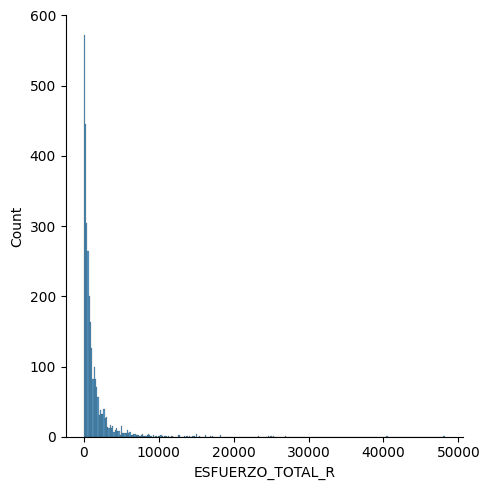

In [3]:
import seaborn as sns

sns.displot(proyectos["ESFUERZO_TOTAL_R"])

In [25]:
from scipy.stats import gamma

gamma.pdf(0.5, proyectos["ESFUERZO_TOTAL_R"].values)

array([ 0.,  0.,  0., ..., nan,  0.,  0.])

In [27]:
gamma.ppf(0.5, proyectos["ESFUERZO_TOTAL_R"].values)

array([ 485.70670734,  260.46674251,  698.15669496, ...,           nan,
        285.88673577, 1135.06668407])

In [30]:
gamma.stats(proyectos["ESFUERZO_TOTAL_R"].values, moments='mvsk')

(array([ 486.04,  260.8 ,  698.49, ...,     nan,  286.22, 1135.4 ]),
 array([ 486.04,  260.8 ,  698.49, ...,     nan,  286.22, 1135.4 ]),
 array([0.09071811, 0.12384435, 0.07567456, ...,        nan, 0.11821702,
        0.05935476]),
 array([0.01234466, 0.02300613, 0.00858996, ...,        nan, 0.0209629 ,
        0.00528448]))

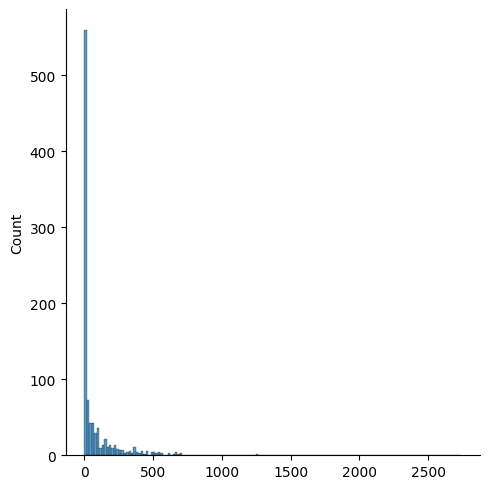

In [33]:
import numpy as np

x = np.random.gamma(0.2, 500, 1000)

sns.displot(x)